In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
song_df_1 = pd.read_csv('./msdchallenge/kaggle_visible_evaluation_triplets.txt', sep='\t', header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']
song_df_1.head()

,user_id,song_id,listen_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [3]:
song_df_2 = pd.read_table('./msdchallenge/unique_tracks.txt', sep='<SEP>', header=None)
song_df_2.columns = ['track_id', 'song_id', 'artist_name', 'title']
song_df_2.head()

,track_id,song_id,artist_name,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [4]:
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")
song_df.head()

,user_id,song_id,listen_count,track_id,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [7]:
import seaborn as sns

#set theme
sns.set_theme(style='white')

In [8]:
artist_df = song_df.groupby(['artist_name'])['listen_count'].agg(np.sum).to_frame()
artist_df = artist_df.reset_index()
artist_df

,artist_name,listen_count
0,!!!,325
1,!Deladap,8
2,& And Oceans,9
3,'68 Comeback,49
4,'N Sync/Phil Collins,344
...,...,...
28356,Étienne Daho,139
28357,Íon,25
28358,Ólafur Arnalds,187
28359,Órla Fallon,10


In [9]:
artist_df = artist_df.sort_values(by='listen_count', ascending=True)
top_artist = artist_df.sort_values(by='listen_count', ascending=False).head(10)
top_artist = top_artist.reset_index(drop=True)
top_artist.to_csv('top_artist.csv',header=None, index=None)
top_artist

,artist_name,listen_count
0,Kings Of Leon,35857
1,Dwight Yoakam,35688
2,Björk,35210
3,Coldplay,32135
4,Florence + The Machine,28224
5,Justin Bieber,26133
6,Alliance Ethnik,21603
7,Train,21356
8,OneRepublic,20802
9,Harmonia,19461


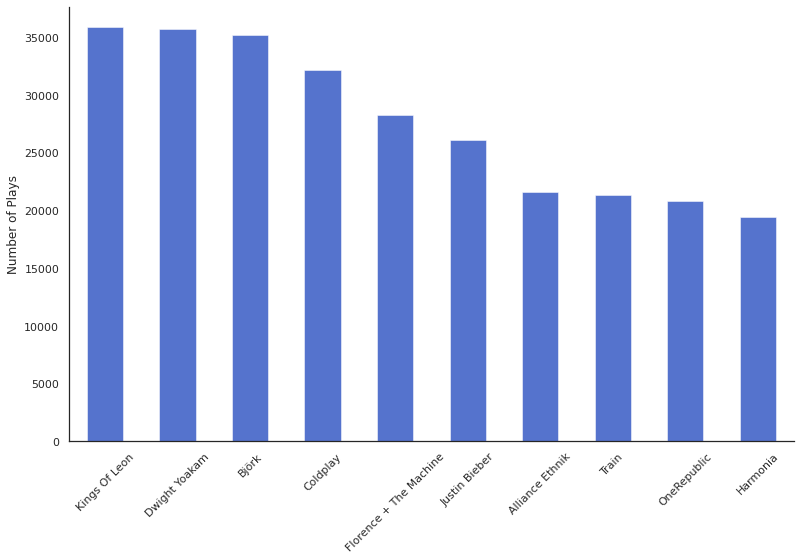

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13,8))
ax = sns.barplot(top_artist['artist_name'], top_artist['listen_count'],color='royalblue',linewidth=0.5)
#ax = plt.bar(top_artist['artist_name'], top_artist['listen_count'],color='royalblue', align='center', width=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title = "",
      xlabel = "",
      ylabel = "Number of Plays")
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .5)

plt.show()

#plt.figure(figsize = (13,8))
#plt.title("Top 10 Artist by Number of Plays")
#plt.box(False)
#plt.xticks(rotation=45)
#plt.yticks([])
#plt.show()

In [11]:
artist_df.describe().T

,count,mean,std,min,25%,50%,75%,max
listen_count,28361.0,163.052784,838.734575,1.0,4.0,17.0,77.0,35857.0


In [12]:
artist_df['play_range'] = np.nan

for i in range(artist_df.shape[0]):
  if artist_df.listen_count[i] <= 10:
    artist_df.play_range[i] = '1-10'
  elif artist_df.listen_count[i] <= 25:
    artist_df.play_range[i] = '10-25'
  elif artist_df.listen_count[i] <= 50:
    artist_df.play_range[i] = '25-50'
  elif artist_df.listen_count[i] <= 100:
    artist_df.play_range[i] = '50-100'
  elif artist_df.listen_count[i] <= 200:
    artist_df.play_range[i] = '100-200'
  elif artist_df.listen_count[i] <= 400:
    artist_df.play_range[i] = '200-400'
  elif artist_df.listen_count[i] <= 800:
    artist_df.play_range[i] = '400-800'
  elif artist_df.listen_count[i] <= 1000:
    artist_df.play_range[i] = '800-1000'
  elif artist_df.listen_count[i] <= 2000:
    artist_df.play_range[i] = '1000-2000'
  elif artist_df.listen_count[i] <= 5000:
    artist_df.play_range[i] = '2000-5000'
  elif artist_df.listen_count[i] <= 10000:
    artist_df.play_range[i] = '5000-10000'
  elif artist_df.listen_count[i] <= 15000:
    artist_df.play_range[i] = '10000-15000'
  elif artist_df.listen_count[i] <= 20000:
    artist_df.play_range[i] = '15000-20000'
  elif artist_df.listen_count[i] <= 25000:
    artist_df.play_range[i] = '20000-25000'
  elif artist_df.listen_count[i] <= 30000:
    artist_df.play_range[i] = '25000-30000'
  elif artist_df.listen_count[i] <= 35000:
    artist_df.play_range[i] = '30000-35000'
  else:
    artist_df.play_range[i] = '35000-40000'

In [13]:
artist_df.head()

,artist_name,listen_count,play_range
28360,Özlem Tekin,1,1-10
18368,Open Season,1,1-10
18369,Open Your Eyes,1,1-10
18375,Opgeduveld,1,1-10
18394,Orange Tulip Conspiracy,1,1-10


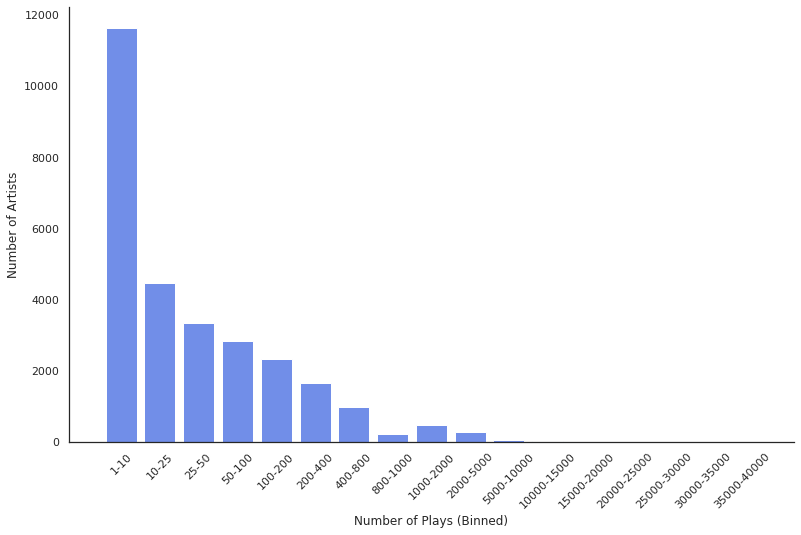

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13,8))
ax = sns.histplot(artist_df.play_range, color='royalblue',binwidth=0.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title = "",
      xlabel = "Number of Plays (Binned)",
      ylabel = "Number of Artists")
plt.xticks(rotation=45)
#plt.ylim(0, 500)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .8)

plt.show()

([<matplotlib.patches.Wedge at 0x7fa9e28d79d0>,
 [Text(-1.056932509116631, 0.3047846308008703, '1-10'),
  Text(-0.07317706887953768, -1.0975632631380297, '10-25'),
  Text(0.7878963385364455, -0.7676062530496108, '25-50'),
  Text(1.0957961519712223, -0.09607701767364724, '50-100'),
  Text(0.9730219777158555, 0.5130577266564899, '100-200'),
  Text(0.6607540768039187, 0.8794339372499798, '200-400'),
  Text(0.3792865980233469, 1.032541367965408, '400-800'),
  Text(0.2075962731217676, 1.080233209721842, '1000-2000'),
  Text(0.11590632795961191, 1.0938764661235376, '2000-5000'),
  Text(0.05371396582264162, 1.098687767236718, '800-1000'),
  Text(0.017058183346377733, 1.0998677276749789, '5000-10000'),
  Text(0.006457990514047353, 1.099981042726883, '10000-15000'),
  Text(0.0032899556139612597, 1.0999950800762968, '15000-20000'),
  Text(0.001827774849696014, 1.0999984814712696, '20000-25000'),
  Text(0.0010966830950098153, 1.0999994533117683, '35000-40000'),
  Text(0.00048743959072091266, 1.09

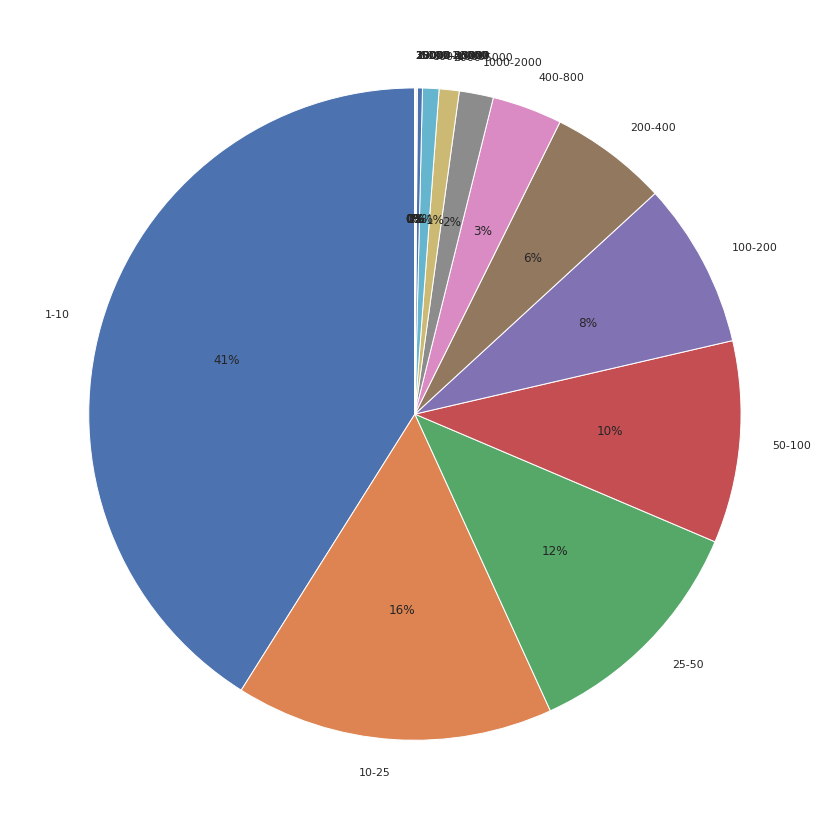

In [15]:
column_values = artist_df.play_range.value_counts()
labels = column_values.index
sizes = column_values.values
plt.figure(figsize = (15,15))
plt.pie(sizes, labels = labels, autopct = '%1.0f%%', startangle = 90)

In [5]:
song_df['song_artist'] = song_df['title'] + ' - ' + song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,track_id,artist_name,title,song_artist
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,You're The One - Dwight Yoakam
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim,Tive Sim - Cartola
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero,El Cuatrero - Miguel Calo


### User based  - Collabotive filtering 

source: https://www.kaggle.com/code/mgmarques/million-song-recommendation-engines/notebook

Matrix factorization methods divide a matrix into core elements so that when these matrices are multiplied, the original matrix is obtained. It simplifies the calculation of more complicated matrix operations. It is  also known as matrix decomposition methods, which are a foundation of linear algebra in computers, even for simple operations like solving systems of linear equations, computing the inverse, and computing the determinant of a matrix.

Matrix factorization could be used to explore latent characteristics(K) between two types of entities.

The utility matrix, a user Vs item dimension matrix, is the beginning for any matrix factorization-based approach. Based on real life scenarios that not all users used all of the items, t his is a sparse matrix. The process of matrix factorization entails determining a low rank approximate solution of the utility matrix. So two low rank matrices of the utility matrix U are derived from the Utility matrix U that it could be reproduced by multiplying those two matrices:

Denoted latent features by K, our goal is to find two matrices X and Y such that their product (matrix multiplication) approximates U.

X = |U| x K matrix (A matrix with dimensions of num_users * factors)

Y = |P| x K matrix (A matrix with dimensions of factors * num_songs)

Multiplying the respective user's row from the first matrix by the item matrix and find the items with the highest ratings from the row could help to make the user recommendation . The first matrix defines the relation between users and latent features, while the second matrix reflects the connection between items (songs in our case) and latent features.


Matrix Factorization and Singular Value Decomposition (SVD)

To identify factorization of any matrix, there are plenty of methods available. The singular value decomposition, or SVD, is one of the simplest. The output of the SVD function could be used to determine the factorization of a matrix by following standard steps: 

- Factorize the matrix to obtain U, S, and V matrices.
- Reduce the matrix S to first k components. (The function this project are using will only provide k dimensions, so this step is skipped.)
- Compute the square root of reduced matrix Sk to obtain the matrix Sk1/2.
- Compute the two resultant matrix U*Sk1/2 and Sk1/2*V as these will serve as two factorized matrices


The prediction of user i for product j could be generated by taking the dot product of the ith row of the first matrix with the jth column of the second matrix.

Following functions are defined to help:

- compute_svd: uses the svds function provided by the scipy library to break down our utility matrix into three different matrices, and prose with the others tree steps above.
- compute_estimated_matrix: uses the decomposed matrices by SVD and provide the predictions.
- show_recomendations: calculate, sort and display recommendations for users.



In [6]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
from scipy.stats import skew, norm, probplot
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

In [8]:
user_song_list_count = song_df[['user_id','song_id','listen_count','title','artist_name','song_artist']]
user_song_list_count = user_song_list_count.rename(columns={'user_id': 'user', 'song_id': 'song'})
user_song_list_count.head()

,user,song,listen_count,title,artist_name,song_artist
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,You're The One,Dwight Yoakam,You're The One - Dwight Yoakam
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Tive Sim,Cartola,Tive Sim - Cartola
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,El Cuatrero,Miguel Calo,El Cuatrero - Miguel Calo


In [7]:
def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 
    max_recommendation = 250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recomendRatings = np.zeros(shape=(MAX_UID,max_recommendation ), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

def show_recomendations(uTest, num_recomendations = 10):
    for user in uTest:
        print('-'*70)
        print("Recommendation for user id {}".format(user))
        rank_value = 1
        i = 0
        while (rank_value <  num_recomendations + 1):
            so = uTest_recommended_items[user,i:i+1][0]
            if (small_set.user[(small_set.so_index_value == so) & (small_set.us_index_value == user)].count()==0):
                song_details = small_set[(small_set.so_index_value == so)].\
                    drop_duplicates('so_index_value')[['title','artist_name']]
                print("The number {} recommended song is {} BY {}".format(rank_value, 
                                                                      list(song_details['title'])[0],
                                                                      list(song_details['artist_name'])[0]))
                rank_value+=1
            i += 1

One thing important to note here is that MSD data has no concept of "rating." We only have the play counts of songs. This is referred to the well-known "implicit feedback" problem in the field of recommendation engines. There are numerous solutions to this problem, and this project will utilize available data in a simple and intuitive way. The play count will be transformed to a fractional number representing its fraction in each user's total count of plays. And t he logic behind is that this fraction is a way of measuring the degree of "likeness" for a song in the [0,1] range for each user.

In [9]:
user_song_list_listen = user_song_list_count[['user','listen_count']].groupby('user').sum().reset_index()
user_song_list_listen.rename(columns={'listen_count':'total_listen_count'},inplace=True)
user_song_list_count_merged = pd.merge(user_song_list_count,user_song_list_listen)
user_song_list_count_merged['fractional_play_count'] = \
    user_song_list_count_merged['listen_count']/user_song_list_count_merged['total_listen_count']

display(user_song_list_count_merged[user_song_list_count_merged.user =='fd50c4007b68a3737fe052d5a4f78ce8aa117f3d']\
        [['user','song','listen_count','fractional_play_count']].head())

,user,song,listen_count,fractional_play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,0.166667
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,0.166667
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,0.166667
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,0.166667
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,0.166667


In [10]:
user_codes = user_song_list_count_merged.user.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
user_codes['us_index_value'] = list(user_codes.index)

song_codes = user_song_list_count_merged.song.drop_duplicates().reset_index()
song_codes.rename(columns={'index':'song_index'}, inplace=True)
song_codes['so_index_value'] = list(song_codes.index)

small_set = pd.merge(user_song_list_count_merged,song_codes,how='left')
small_set = pd.merge(small_set,user_codes,how='left')
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']]

data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values

data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)

display(data_sparse)

print('User used to performed the item similarity based recommendations earlie:.')
display(user_codes[user_codes.user =='fd50c4007b68a3737fe052d5a4f78ce8aa117f3d'])

<110000x163206 sparse matrix of type '<class 'numpy.float64'>'
	with 1450933 stored elements in COOrdinate format>

User used to performed the item similarity based recommendations earlie:.


,user_index,user,us_index_value
0,0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,0


In [11]:
K=50
urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]

U, S, Vt = compute_svd(urm, K)
uTest = [0]

uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

show_recomendations(uTest)

----------------------------------------------------------------------
Recommendation for user id 0
The number 1 recommended song is Check Mate BY Upside Down Room
The number 2 recommended song is Rianna BY Fisher
The number 3 recommended song is Cuenta Conmigo BY Jerry Rivera
The number 4 recommended song is It Takes A Fool To Remain Sane BY The Ark
The number 5 recommended song is Repair Machines BY Vitalic
The number 6 recommended song is Robot Soul (Radio Edit) BY Cosmo Vitelli
The number 7 recommended song is I Think I'll Live BY Charlie Louvin
The number 8 recommended song is Word Up! BY Cameo
The number 9 recommended song is Monster BY Lady GaGa
The number 10 recommended song is Fallen Angel BY Elbow
